In [1]:
from mytorch import MLP
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def f(x):
    return x**4 + x**3 

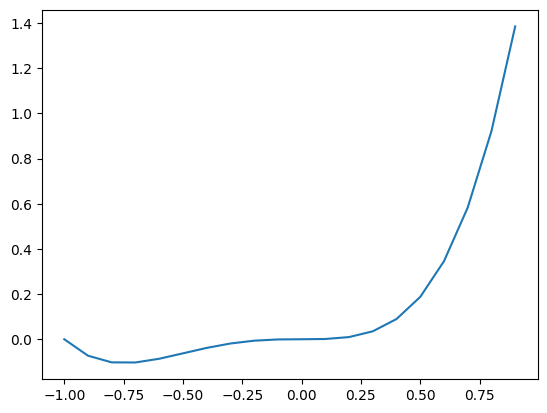

In [44]:
xs = np.arange(-1, 1, 0.1)
ys = f(xs)
plt.plot(xs, ys)

In [45]:
xs = [[x] for x in list(xs)]
ys = list(ys)
print(xs, ys)

[[-1.0], [-0.9], [-0.8], [-0.7000000000000001], [-0.6000000000000001], [-0.5000000000000001], [-0.40000000000000013], [-0.30000000000000016], [-0.20000000000000018], [-0.1000000000000002], [-2.220446049250313e-16], [0.09999999999999964], [0.19999999999999973], [0.2999999999999998], [0.3999999999999997], [0.49999999999999956], [0.5999999999999996], [0.6999999999999997], [0.7999999999999996], [0.8999999999999995]] [0.0, -0.07290000000000008, -0.10240000000000005, -0.10289999999999999, -0.08640000000000003, -0.06250000000000003, -0.03840000000000004, -0.018900000000000024, -0.006400000000000015, -0.0009000000000000053, -1.0947644252537631e-47, 0.001099999999999988, 0.00959999999999996, 0.03509999999999993, 0.08959999999999976, 0.18749999999999944, 0.3455999999999993, 0.5830999999999993, 0.9215999999999984, 1.3850999999999973]


In [46]:
n = MLP(1, [4,4,1])

def calculate_loss(ypred, ys):
    return sum([(pred - actual) ** 2 for pred, actual in zip(ypred, ys)])

steps = 1001
learning_rate = 0.01

for k in range(steps):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = calculate_loss(ypred, ys)

    # since grads do +=, we need to reset each time
    n.zero_grad()

    # backward pass
    loss.backward()

    # a positive gradient means increasing value will increase the loss
    # neg is inverse
    for p in n.parameters():
        p.data += -learning_rate * p.grad
        
    if k % 100 == 0:
        print(k, loss.data)


ypred = [n(x) for x in xs]
print("TOTAL LOSS", calculate_loss(ypred, ys))


0 5.39715356968959
100 0.62043975778765
200 0.46550980404650044
300 0.4189336077067194
400 0.352668537179985
500 0.3168758261386584
600 0.2733100498214267
700 0.26268637035625464
800 0.2339182325502743
900 0.22744822656646252
1000 0.2196802861148797
TOTAL LOSS Value(data=0.2196079634301974)


TOTAL LOSS 0.2196079634301974


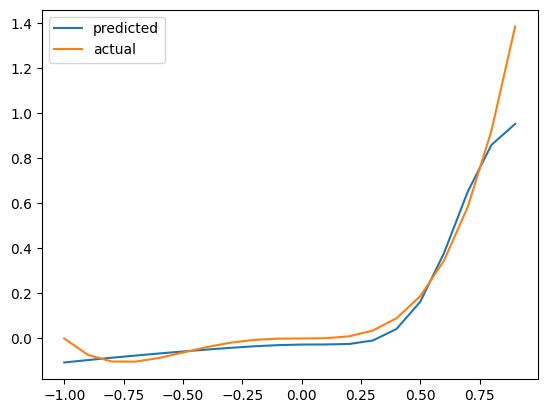

In [47]:
ypred = [n(x).data for x in xs]
print("TOTAL LOSS", calculate_loss(ypred, ys))
plt.plot(xs, ypred, label="predicted")
plt.plot(xs, ys, label="actual")
plt.legend(loc='best')
plt.show()